<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка данных</a></span><ul class="toc-item"><li><span><a href="#Импорт-всех-необходимых-библиотек" data-toc-modified-id="Импорт-всех-необходимых-библиотек-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Импорт всех необходимых библиотек</a></span></li><li><span><a href="#Открытие-и-анализ-исходных-данных" data-toc-modified-id="Открытие-и-анализ-исходных-данных-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Открытие и анализ исходных данных</a></span></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Умножение-матриц" data-toc-modified-id="Умножение-матриц-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Умножение матриц</a></span><ul class="toc-item"><li><span><a href="#Обоснование" data-toc-modified-id="Обоснование-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Обоснование</a></span></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Алгоритм-преобразования" data-toc-modified-id="Алгоритм-преобразования-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Алгоритм преобразования</a></span><ul class="toc-item"><li><span><a href="#Алгоритм" data-toc-modified-id="Алгоритм-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Алгоритм</a></span></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Проверка-алгоритма" data-toc-modified-id="Проверка-алгоритма-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Проверка алгоритма</a></span><ul class="toc-item"><li><span><a href="#Создание-обратимой-матрицы" data-toc-modified-id="Создание-обратимой-матрицы-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Создание обратимой матрицы</a></span></li><li><span><a href="#Выделение-признаков-из-исходных-данных" data-toc-modified-id="Выделение-признаков-из-исходных-данных-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Выделение признаков из исходных данных</a></span></li><li><span><a href="#Умножение-матриц" data-toc-modified-id="Умножение-матриц-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>Умножение матриц</a></span></li><li><span><a href="#Обучение-и-проверка-моделей" data-toc-modified-id="Обучение-и-проверка-моделей-4.4"><span class="toc-item-num">4.4&nbsp;&nbsp;</span>Обучение и проверка моделей</a></span></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-4.5"><span class="toc-item-num">4.5&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Чек-лист-проверки" data-toc-modified-id="Чек-лист-проверки-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Чек-лист проверки</a></span></li></ul></div>

# Защита персональных данных клиентов

Вам нужно защитить данные клиентов страховой компании «Хоть потоп». Разработайте такой метод преобразования данных, чтобы по ним было сложно восстановить персональную информацию. Обоснуйте корректность его работы.

Нужно защитить данные, чтобы при преобразовании качество моделей машинного обучения не ухудшилось. Подбирать наилучшую модель не требуется.

## Подготовка данных

### Импорт всех необходимых библиотек

In [1]:
import pandas as pd
import numpy as np
import seaborn as sb
from matplotlib import pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

###  Открытие и анализ исходных данных

In [2]:
try:
    data=pd.read_csv(r'.......csv', sep=',')
    pd.set_option('display.max_columns', None) 
except:
    data=pd.read_csv('........csv', sep=',')
    pd.set_option('display.max_columns', None)

data.tail(10)

,Пол,Возраст,Зарплата,Члены семьи,Страховые выплаты
4990,0,22.0,56800.0,1,0
4991,0,21.0,38300.0,3,0
4992,0,45.0,54600.0,0,1
4993,1,32.0,36000.0,1,0
4994,1,26.0,51400.0,0,0
4995,0,28.0,35700.0,2,0
4996,0,34.0,52400.0,1,0
4997,0,20.0,33900.0,2,0
4998,1,22.0,32700.0,3,0
4999,1,28.0,40600.0,1,0


In [3]:
# Проверка наличия пропусков, типа данных и д.р.
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Пол                5000 non-null   int64  
 1   Возраст            5000 non-null   float64
 2   Зарплата           5000 non-null   float64
 3   Члены семьи        5000 non-null   int64  
 4   Страховые выплаты  5000 non-null   int64  
dtypes: float64(2), int64(3)
memory usage: 195.4 KB


In [4]:
#Проверка аличия явных дубликатов
data.duplicated().sum()

153

*Количество дубликатов позволяет удалить их без существенного ущерба для данных*

In [5]:
data=data.drop_duplicates()
data.duplicated().sum()

0

In [6]:
# Прверка зависимости признаков 
data.corr()

,Пол,Возраст,Зарплата,Члены семьи,Страховые выплаты
Пол,1.000000,0.001953,0.015456,-0.007315,0.011565
Возраст,0.001953,1.000000,-0.017386,-0.009064,0.654964
Зарплата,0.015456,-0.017386,1.000000,-0.031687,-0.013123
Члены семьи,-0.007315,-0.009064,-0.031687,1.000000,-0.039303
Страховые выплаты,0.011565,0.654964,-0.013123,-0.039303,1.000000


<AxesSubplot:>

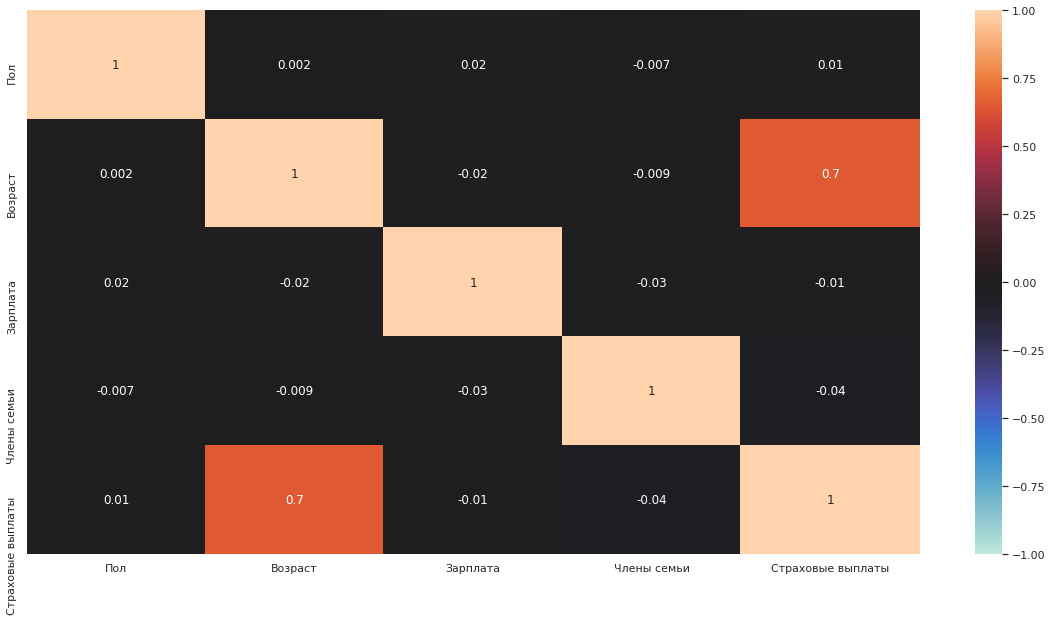

In [7]:
sb.set(rc = {'figure.figsize':(20,10)})
sb.heatmap(data.corr(),annot = True, fmt='.1g', vmin=-1, vmax=1, center= 0)

*Существенной зависимости не обнаружено. Есть взаимосвязь признаков "возраст" и Страховые выплаты", однако её значение не близко 1. С данными по этим характеристикам делать ничего не буду.*

<Figure size 720x432 with 0 Axes>

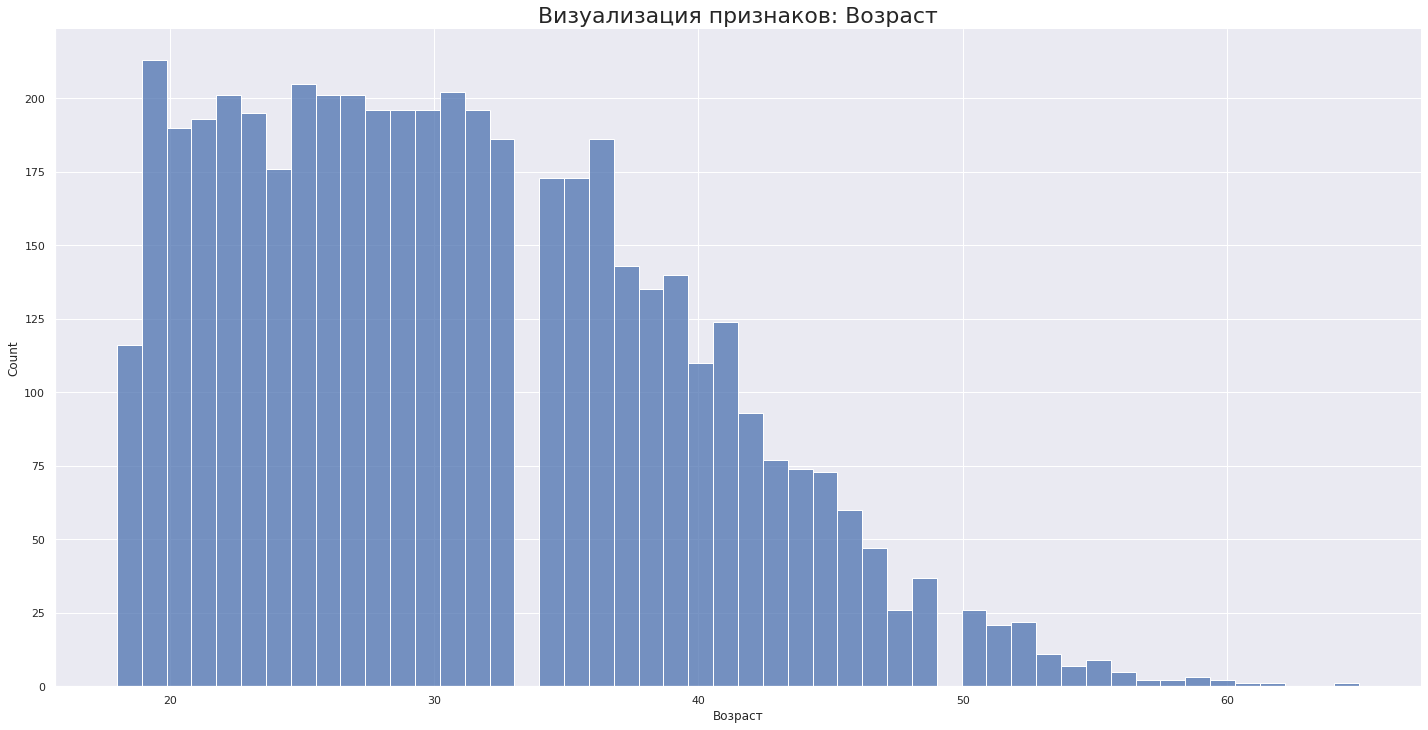

<Figure size 720x432 with 0 Axes>

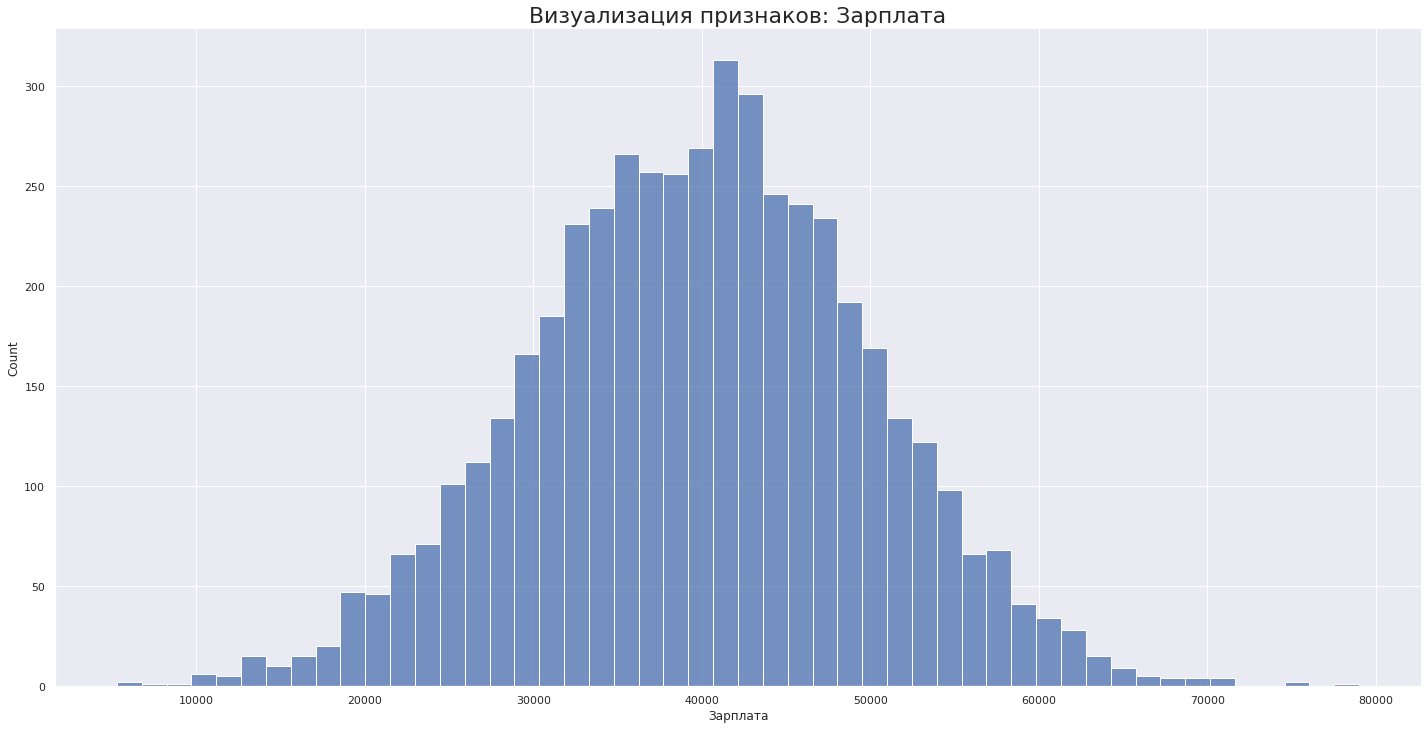

<Figure size 720x432 with 0 Axes>

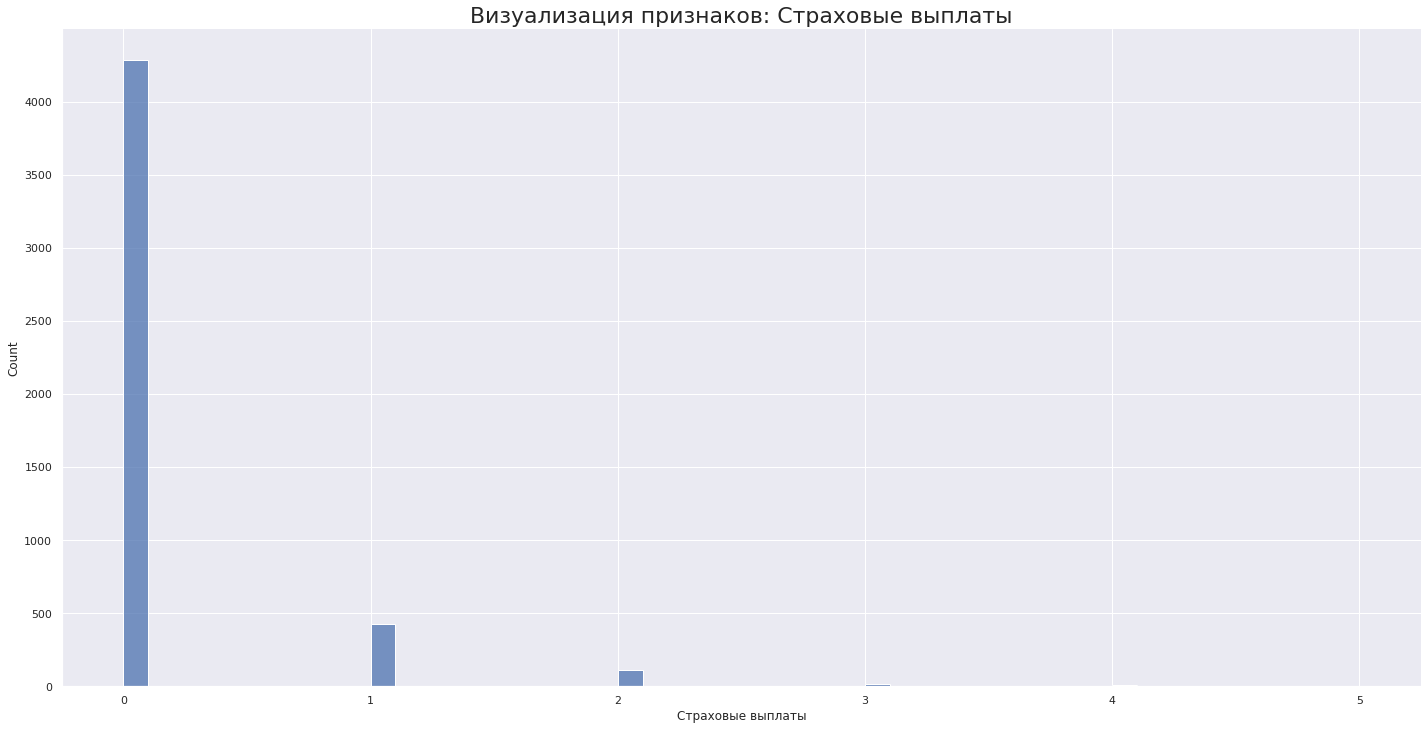

<Figure size 720x432 with 0 Axes>

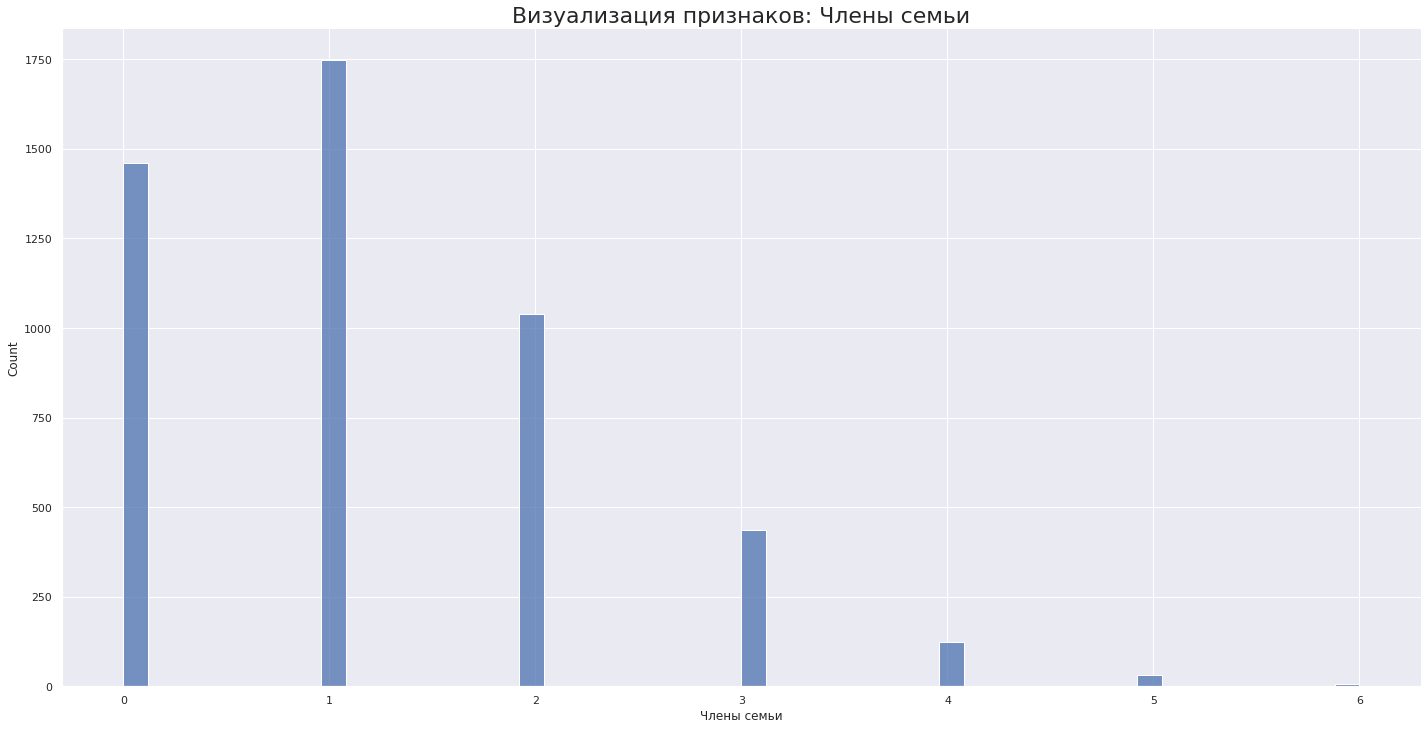

In [8]:
#Визуализирую признаки кроме пола
columns = ['Возраст', 'Зарплата', 'Страховые выплаты', 'Члены семьи']
for column in columns:
    plt.figure(figsize=(10,6))
    sb.displot(data[column], kind="hist", bins=50, fill=True,  multiple="stack", height=10, aspect=2,legend=False)
    plt.title(f'Визуализация признаков: {column}', fontsize=22)

    plt.show()

### Вывод

Исходные данные были проверены на наличие пропусков, дубликатов, мультиколлинеарности. Пропусков в таблице нет, дубликаты удалены. Других действий с исхдными данными не проводила.

## Умножение матриц

В этом задании вы можете записывать формулы в *Jupyter Notebook.*

Чтобы записать формулу внутри текста, окружите её символами доллара \\$; если снаружи —  двойными символами \\$\\$. Эти формулы записываются на языке вёрстки *LaTeX.* 

Для примера мы записали формулы линейной регрессии. Можете их скопировать и отредактировать, чтобы решить задачу.

Работать в *LaTeX* необязательно.

Обозначения:

- $X$ — матрица признаков (нулевой столбец состоит из единиц)

- $y$ — вектор целевого признака

- $P$ — матрица, на которую умножаются признаки

- $w$ — вектор весов линейной регрессии (нулевой элемент равен сдвигу)

Предсказания:

$$
a = Xw
$$

Задача обучения:

$$
w = \arg\min_w MSE(Xw, y)
$$

Формула обучения:

$$
w = (X^T X)^{-1} X^T y
$$

### Обоснование

1. Для решение ответа на вопрос и обоснования получу предсказания для домноженных признаков. Предположу. что размерность признаков (Х) 4847х4 (как в исходных данных после удаления дубликатов), а матрицы, на которую умножаются признаки (Р) 4х4. В Этом случае формула предсказания будет вглядеть так:
$$
a = XРw
$$

2. Если формулу обучения для РХ подставить в формулу предсказания, получим:
$$
а_1 = ХР((XP)^T XP)^{-1} XP^T y
$$

3. В дальнейшем применю известные свойства матрицы:
$$
(A*B)^{-1} = B^{-1}*A^{-1}
$$

$$
(A*B)^Т = B^Т*A^Т
$$

$$
A*А^{-1} = Е
$$

$$
АЕ=ЕА=А
$$

4. У учётом указанных свойст, аскроем скобки с транспонированием матриц

$$
а_1 = ХР(P^TХ^TXP)^{-1} P^TХ^T y
$$

5. Одно из свойств матриц позволяет группировать их внутри произведения различным образом. У нас в скобках матрицы Х (5000х4), Р (4х4), $Х^T$(4х5000) и $Р^T$ (4х4). Теперь группирую множитили ($Р^TХ^TХ$иР) таким образом, чтобы они стали кваратными матрицами, поскольку обратная матрица берётся только от квадратной:
$$
а_1 = ХРР^{-1}(P^TХ^TX)^{-1} P^TХ^Ty
$$

Далее, выделяю множители Р^TХ^T и Х:

$$
а_1 = ХРР^{-1}(Х^TX)^{-1}(P^T)^{-1} P^TХ^Ty
$$

6. $РР^{-1}$ и $(P^T)^{-1}P^T$ допустимо исключить, поскольку их произведения дают единичные матрицы:

$$
а_1 = Х(Х^TX)^{-1}Х^Ty
$$


7. Так как  $w = (X^T X)^{-1} X^T y$, получаем $а_1 = Хw$
Т.е. преобразовав формулы получили исходную формулу предсказания

### Вывод

Исходя их приведённого обоснования предположу, что умножение признаков на обратимую матрицу, качество линейной регрессии не изменится

## Алгоритм преобразования

### Алгоритм

1. В первую очередь создам случайную матрицу шифрования размером 4х4, на которую умножу предсказания. Размерность матрицы обусловлена тем, что количество строк новой матрицы должно быть равно количеству столбцов матрицы признаков.<br>
Отмечу, что количество признаков в матрице признаков будет рано 4, поскольку я выделю целевой признак.<br>
2. Матрицу шфрования создам с помощью `np.random.normal`. Обязательным условием является обратимость матрицы и исключение возможности случайного создания необратимой матрицы. Для этого проверю не равен ли её определитель нулю.<br> 
3. Обучу модель линейнй регрессии сначала на матрице исходных признаков, затем на новой матрице (признаки умноженные на обратимую).
4. Качество моделей проверю метрикой R2.

### Вывод

Так как в предыдущем шаге обосновано, что умножение на обратимую матрицу не не изменяет качество модели, метрики R2 в двух случая должны быть равны.


## Проверка алгоритма

### Создание обратимой матрицы

In [9]:
state = np.random.RandomState(12345)

In [10]:
det = 0 # определитель
matrix = 0
while det == 0:
    matrix = np.random.normal(size=(4, 4))
    det = np.linalg.det(matrix)
matrix

array([[ 1.42781248,  0.02415042, -0.58945814,  0.52069832],
       [ 1.49923314,  2.90305742,  1.46052341, -0.5418685 ],
       [ 1.10522725, -0.72452878,  0.06421204,  1.58162883],
       [-0.7239919 ,  1.98334771,  0.81789884,  0.52805823]])

In [11]:
matrix.shape

(4, 4)

### Выделение признаков из исходных данных

In [12]:
features=data.drop('Страховые выплаты', axis=1)
features.head()

,Пол,Возраст,Зарплата,Члены семьи
0,1,41.0,49600.0,1
1,0,46.0,38000.0,1
2,0,29.0,21000.0,0
3,0,21.0,41700.0,2
4,1,28.0,26100.0,0


In [13]:
features.shape

(4847, 4)

In [14]:
target = data['Страховые выплаты']

In [15]:
target.shape

(4847,)

### Умножение матриц

In [16]:
new_matrix=features@matrix
new_matrix.head()

,0,1,2,3
0,54881.443744,-35815.594573,3245.027301,78427.622114
1,42066.876053,-27396.569603,2508.059661,60077.497646
2,23253.249912,-15130.915688,1390.808110,33198.491243
3,46118.012040,-30147.919172,2709.949039,65943.599087
4,28889.837442,-18828.891367,1716.239555,41265.860842


In [17]:
new_matrix.shape

(4847, 4)

### Обучение и проверка моделей

In [18]:
# Признаки из исходной таблицы с данными
model_1=LinearRegression()
model_1.fit(features, target)
predictions = model_1.predict(features)
'Метрика R2 для модели, обученной на исходных признаках:',r2_score(target, predictions)

('Метрика R2 для модели, обученной на исходных признаках:', 0.4302010044852067)

In [19]:
# Признаки из зашифрованной матрицы
model_2=LinearRegression()
model_2.fit(new_matrix, target)
predictions_new = model_2.predict(new_matrix)
'Метрика R2 для модели, обученной на шифрованных данных:',r2_score(target, predictions_new)

('Метрика R2 для модели, обученной на шифрованных данных:', 0.4302010044852087)

In [20]:
'Округлённая метрика R2 для модели, обученной на исходных признаках:',r2_score(target, predictions).round(3)

('Округлённая метрика R2 для модели, обученной на исходных признаках:', 0.43)

In [21]:
'Округлённая метрика R2 для модели, обученной на шифрованных данных:',r2_score(target, predictions_new).round(3)

('Округлённая метрика R2 для модели, обученной на шифрованных данных:', 0.43)

### Вывод

Созданная шифрованная матрица (посредством произведения признаков на обратимую матрицу) по размеру соотвествует признакам исходного датасента.<br>
Модель линейной регрессии была обучена сначала на данных из представленного датасента, затем на данных новой матрицы. Качество моделей проверялось метрикой R2. Исходя из значения метрики, качество одинаковое. Это указывает на то, что качество модели не страдает при умножении признаков на обратимую матрицу.<br>
В результате шифрования данные клиентов страховой компании, качество предсказываний не изменилось. А значит выбранный метод преобразования данны подходт для выполнени задания.